In [808]:
# Key Objectives:
# 1. Import necessary libraries and load the dataset.
# 2. Perform initial data Inspection.
# 3. Perform Data Preprocessing: Clean and prepare the dataset for analysis.
# 4. Perform Exploratory Data Analysis (EDA): Analyze the dataset to uncover key features, patterns and insights.
# 5. Perform Feature Engineering: Create new features or modify existing ones to enhance the dataset.
# 6. Perform Data Visualization: Create visual representations of the data to communicate findings effectively. 
# 7. Save the cleaned dataset for future use.
# 8. Identify key insights from the analysis and visualizations and make recommendations based on the findings.


# 1. Import Necessary Libraries

In [809]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') 

# 2. Load the Dataset

In [810]:
df = pd.read_csv('Life_Expectancy_Data.csv')

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 3. Data Inspection

In [811]:
print(f"Dataset shape: {df.shape}\n")

Dataset shape: (1649, 22)



In [812]:
print("Data types:")
print(df.dtypes)

Data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [813]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [814]:
print("\nDescriptive statistics:")
df.describe()


Descriptive statistics:


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


# 4. Data Cleaning

## 4.1 Correcting Data Types

In [ ]:
df['Country'] = df['Country'].astype('category')]
df['Status'] = df['Status'].astype('category')

## 4.2 Removing Duplicates

In [816]:
#Checking if there are any duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## 4.3 Handling Skewness (Log Transformation)

In [817]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerical_cols].skew()
print("\nSkewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Year                               -0.200171
Life expectancy                    -0.628758
Adult Mortality                     1.276429
infant deaths                       8.477369
Alcohol                             0.662518
percentage expenditure              4.980574
Hepatitis B                        -1.793377
Measles                             7.957838
 BMI                               -0.233601
under-five deaths                   8.340863
Polio                              -2.360177
Total expenditure                   0.213362
Diphtheria                         -2.487492
 HIV/AIDS                           4.974176
GDP                                 4.517297
Population                         14.186299
 thinness  1-19 years               1.821074
 thinness 5-9 years                 1.866980
Income composition of resources    -1.155244
Schooling                          -0.128164
dtype: float64


In [818]:
high_skew = skewness[abs(skewness) >= 5].index
for col in high_skew:
    df[col] = np.log1p(df[col])
    print(f"Applied log transformation to {col}")   
    
skewness = df[numerical_cols].skew()
print("\nSkewness after transformation:")
print(skewness)

Applied log transformation to infant deaths
Applied log transformation to Measles 
Applied log transformation to under-five deaths 
Applied log transformation to Population

Skewness after transformation:
Year                              -0.200171
Life expectancy                   -0.628758
Adult Mortality                    1.276429
infant deaths                      0.718501
Alcohol                            0.662518
percentage expenditure             4.980574
Hepatitis B                       -1.793377
Measles                            0.560259
 BMI                              -0.233601
under-five deaths                  0.666207
Polio                             -2.360177
Total expenditure                  0.213362
Diphtheria                        -2.487492
 HIV/AIDS                          4.974176
GDP                                4.517297
Population                        -0.544872
 thinness  1-19 years              1.821074
 thinness 5-9 years                1.866980
Inc

### 4.4 Removing trailing  and leading spaces from column names (inplace=True)

In [819]:
df.columns = df.columns.str.strip()

# 5. Feature Correlation Analysis

## 5.1 Correlation Heatmap

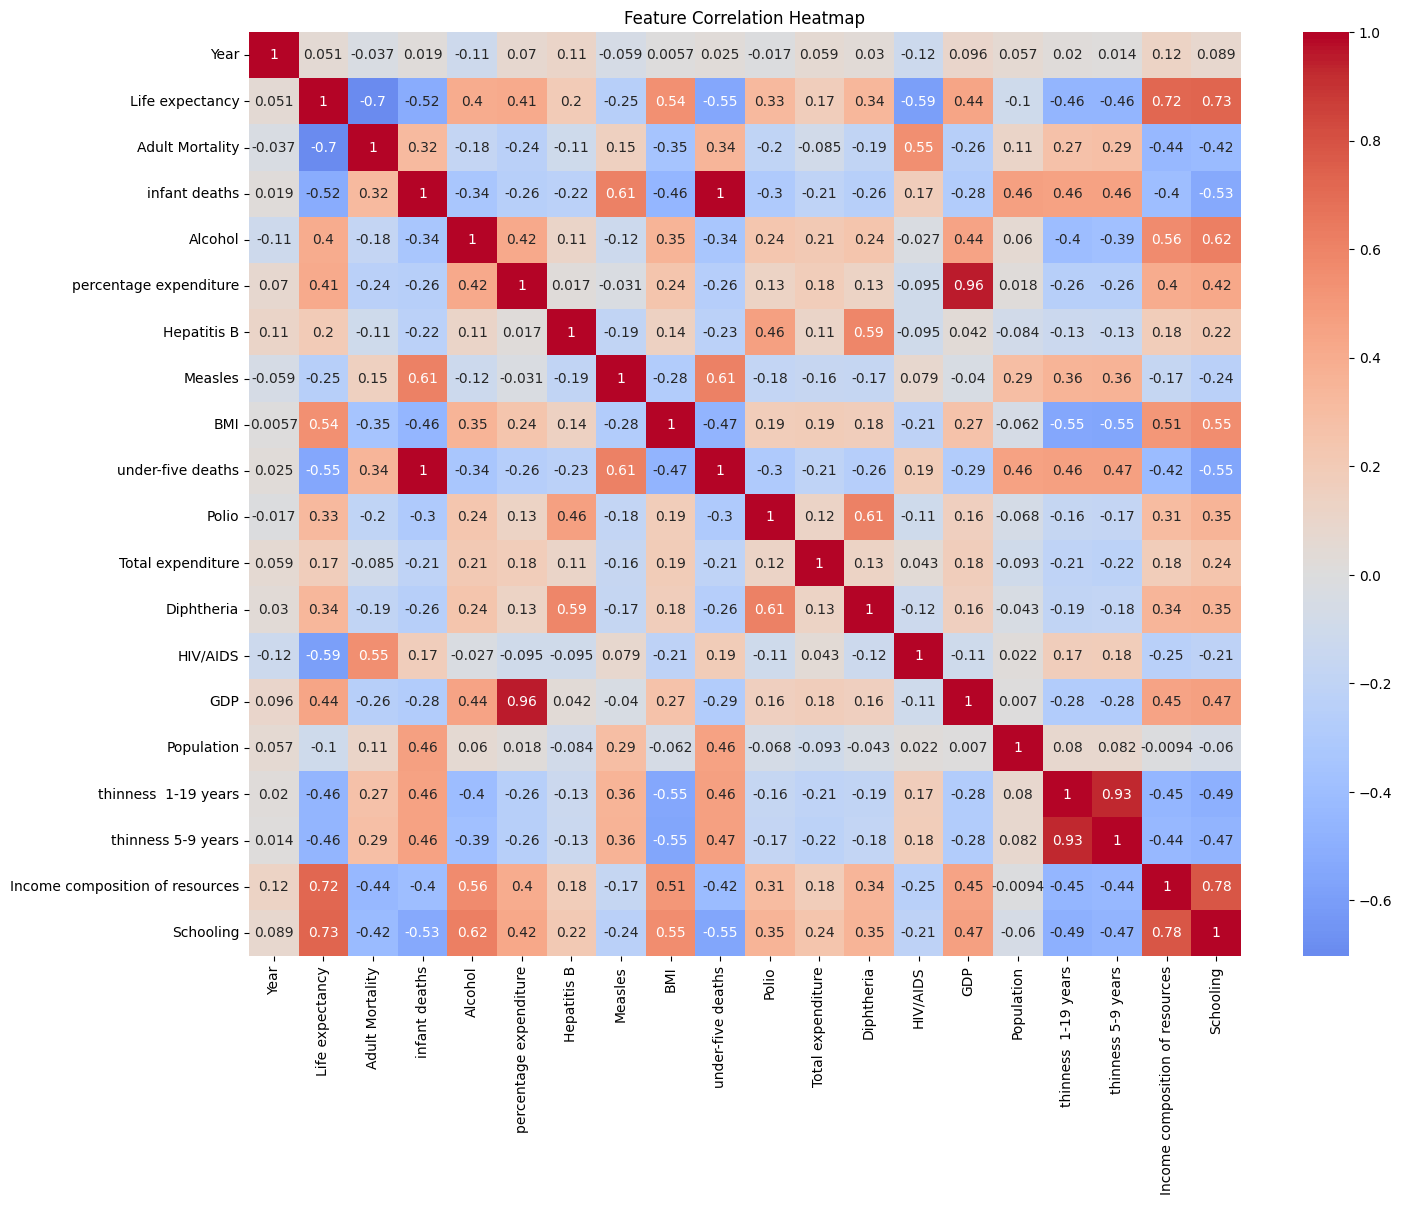

In [820]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

## 5.2 Remove Highly Correlated Features to avoid redundancy (|correlation|>0.8)

In [821]:
# Getting rid of under-five deaths column since it is perfectly positively correlated with infant deaths hence a redundant feature
df.drop(columns=['under-five deaths'], inplace=True)
df.shape

# Getting rid of thinness 5-9 since it is very highly positively correlated with thinness 1-19 years hence a redundant feature
df.drop(columns=['thinness 5-9 years'], inplace=True)

# Gettting rid of percent expenditure since it is highly negatively correlated with GDP
df.drop(columns=['percentage expenditure'], inplace=True)

## 5.3 Display Reduced Correlation Heatmap

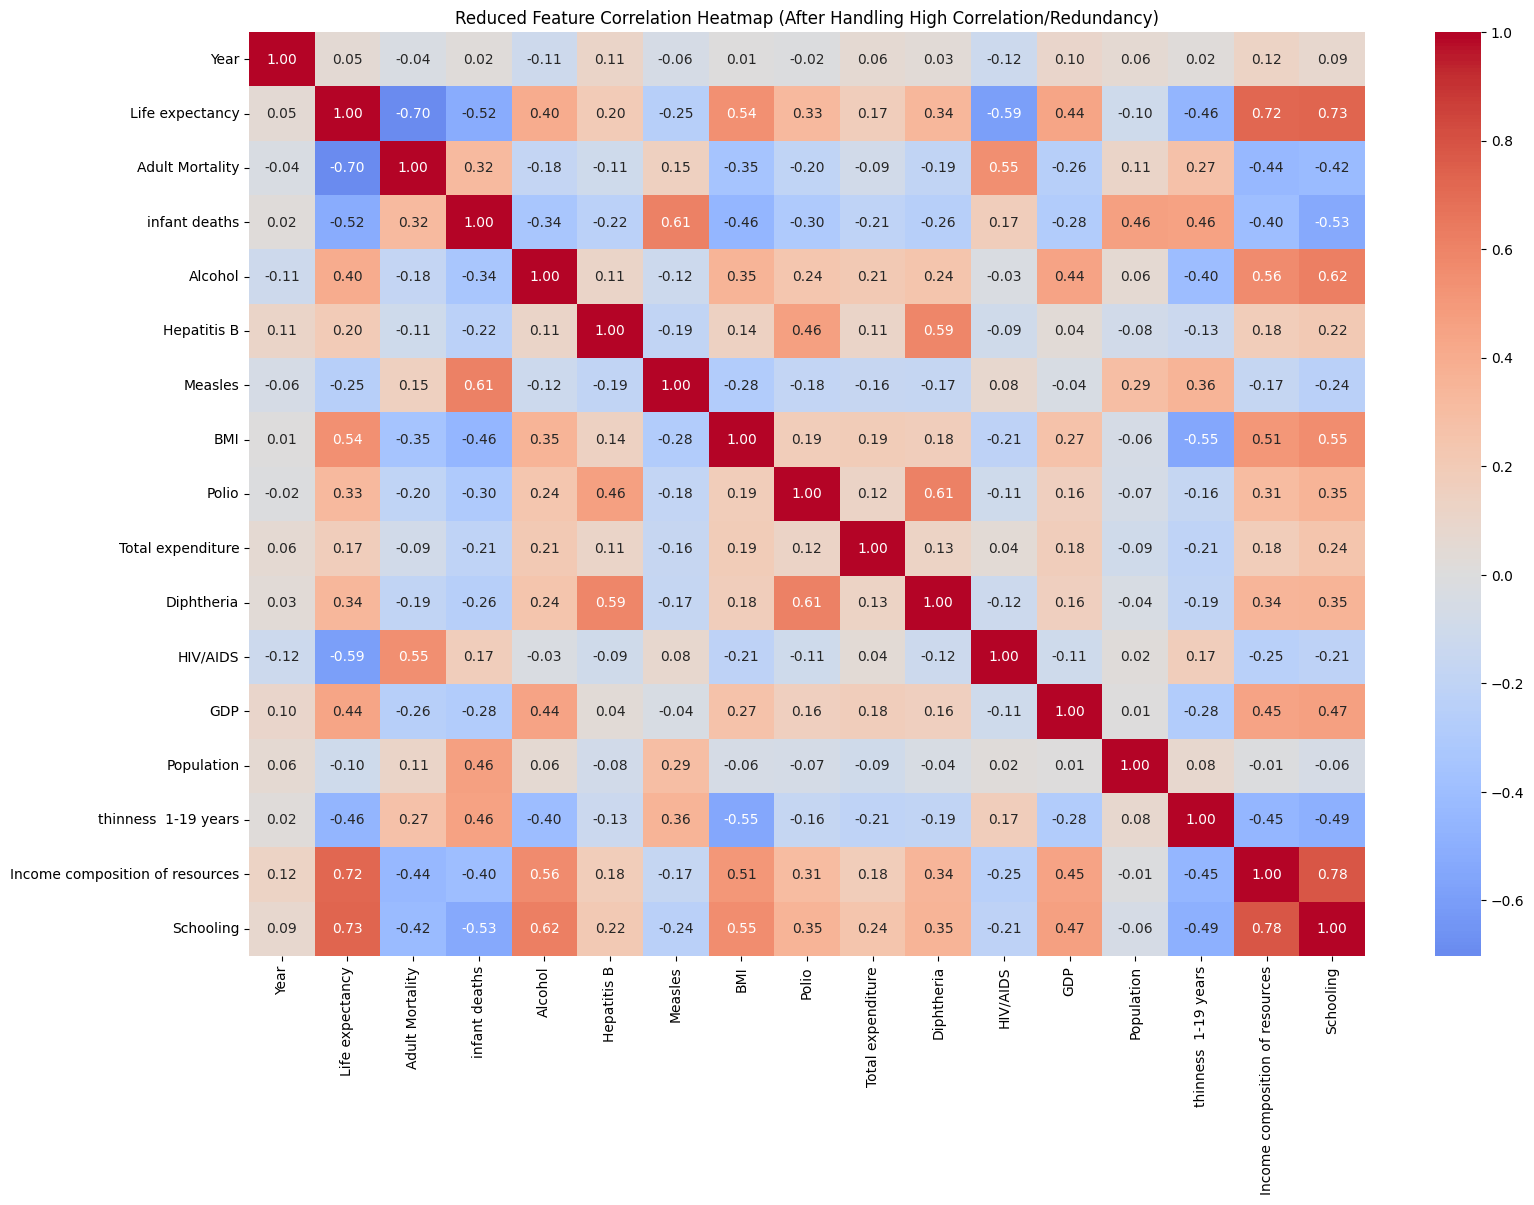

In [822]:
plt.figure(figsize=(18, 12))
df_reduced = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(df_reduced, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Reduced Feature Correlation Heatmap (After Handling High Correlation/Redundancy)")
plt.show()

## 6. Top 5 Features Correlated with Life Expectancy

In [823]:
# Get absolute correlations with Life expectancy, sort, and select top 5 features
top_5_features = df_reduced['Life expectancy'].abs().sort_values(ascending=False).drop('Life expectancy').head(5).index
print("Top 5 Features Most Correlated with Life Expectancy:")
print(df_reduced.loc[top_5_features, 'Life expectancy']) 

Top 5 Features Most Correlated with Life Expectancy:
Schooling                          0.727630
Income composition of resources    0.721083
Adult Mortality                   -0.702523
HIV/AIDS                          -0.592236
BMI                                0.542042
Name: Life expectancy, dtype: float64


# 7. Feature Engineering

## 7.1 Vaccination Composite Feature

In [824]:
df['Vaccination'] = df[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']].mean(axis=1)

## 7.2 Mortality Composite Feature

In [825]:
df['Total_Mortality'] = df[['infant deaths', 'Adult Mortality']].mean(axis=1)

## 7.3 BMI Categories

In [826]:
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

## 7.4 GDP per Capita

In [827]:
df['GDP_per_capita'] = df['GDP'] / df['Population']

## 7.5 Total Expenditure per Capita

In [828]:
df['Total_expenditure_per_capita'] = df['Total expenditure'] / df['Population']

## 7.6 Income Composition of Resources Per Capita

In [829]:
df['Income_composition_of_resources_per_capita'] = df['Income composition of resources'] / df['Population']

## 7.7 DataFrame With Engineered Features

In [830]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,...,Population,thinness 1-19 years,Income composition of resources,Schooling,Vaccination,Total_Mortality,BMI Category,GDP_per_capita,Total_expenditure_per_capita,Income_composition_of_resources_per_capita
0,Afghanistan,2015,Developing,65.0,263,4.143135,0.01,65,7.051856,19.1,...,17.334091,17.2,0.479,10.1,35.762964,133.571567,Normal,33.705789,0.470749,0.027633
1,Afghanistan,2014,Developing,59.9,271,4.174387,0.01,62,6.200509,18.6,...,12.699497,17.5,0.476,10.0,47.050127,137.587194,Normal,48.245732,0.644120,0.037482
2,Afghanistan,2013,Developing,59.9,268,4.204693,0.01,64,6.066108,18.1,...,17.272826,17.7,0.470,9.9,49.016527,136.102346,Underweight,36.574499,0.470682,0.027210
3,Afghanistan,2012,Developing,59.5,272,4.248495,0.01,67,7.933080,17.6,...,15.123021,17.9,0.463,9.8,52.233270,138.124248,Underweight,44.300606,0.563379,0.030616
4,Afghanistan,2011,Developing,59.2,275,4.276666,0.01,68,8.011023,17.2,...,14.906964,18.2,0.454,9.5,53.002756,139.638333,Underweight,4.262252,0.527941,0.030456


# 8. Correlation of New Features with Life Expectancy

In [831]:
# Encoding categorical variables for correlation
le = LabelEncoder()
df['BMI Category_encoded'] = le.fit_transform(df['BMI Category'])

new_features_corr = df[['Vaccination','Total_Mortality', 'BMI Category_encoded', 'GDP_per_capita', 'Total_expenditure_per_capita','Income_composition_of_resources_per_capita']].corrwith(df['Life expectancy'])
print("Correlation of New Features with Life Expectancy:")
print(new_features_corr)

Correlation of New Features with Life Expectancy:
Vaccination                                   0.329484
Total_Mortality                              -0.706340
BMI Category_encoded                         -0.186486
GDP_per_capita                                0.425759
Total_expenditure_per_capita                  0.193366
Income_composition_of_resources_per_capita    0.555134
dtype: float64


# 9. Considering Updated Data Frame, Obtaining Features with High Correlation (≥ 0.5)

In [832]:
#This is for us to obtain the key variables for visualization
life_exp_corr = df.select_dtypes(include=[np.number]).corr()['Life expectancy'].drop('Life expectancy')
high_corr_features = life_exp_corr[abs(life_exp_corr) >= 0.5].index.tolist()
print("\nFeatures with |correlation| ≥ 0.5 with Life Expectancy:")
print(life_exp_corr[high_corr_features])


Features with |correlation| ≥ 0.5 with Life Expectancy:
Adult Mortality                              -0.702523
infant deaths                                -0.517603
BMI                                           0.542042
HIV/AIDS                                     -0.592236
Income composition of resources               0.721083
Schooling                                     0.727630
Total_Mortality                              -0.706340
Income_composition_of_resources_per_capita    0.555134
Name: Life expectancy, dtype: float64


# 10. Visualizations

## 10.1 Scatter Plots

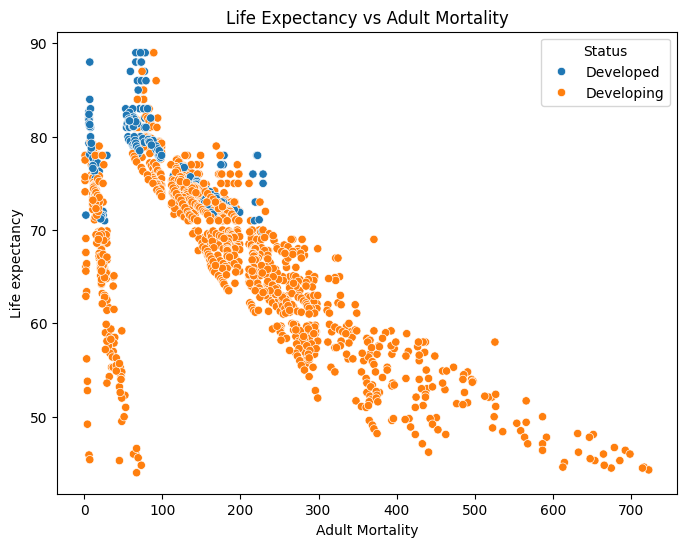

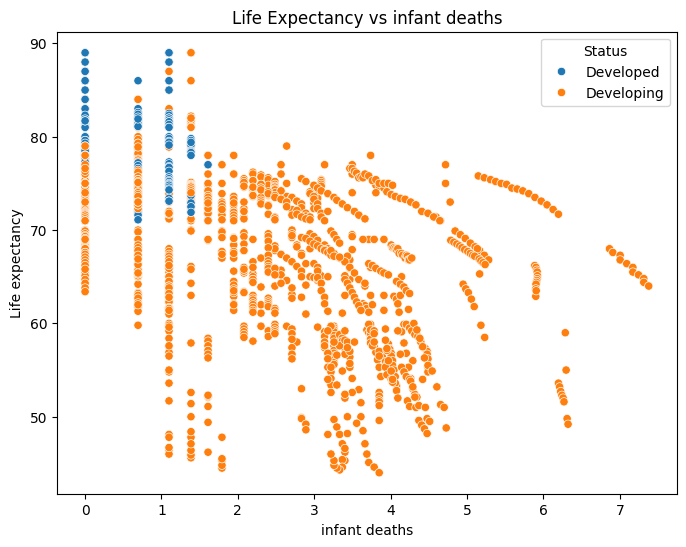

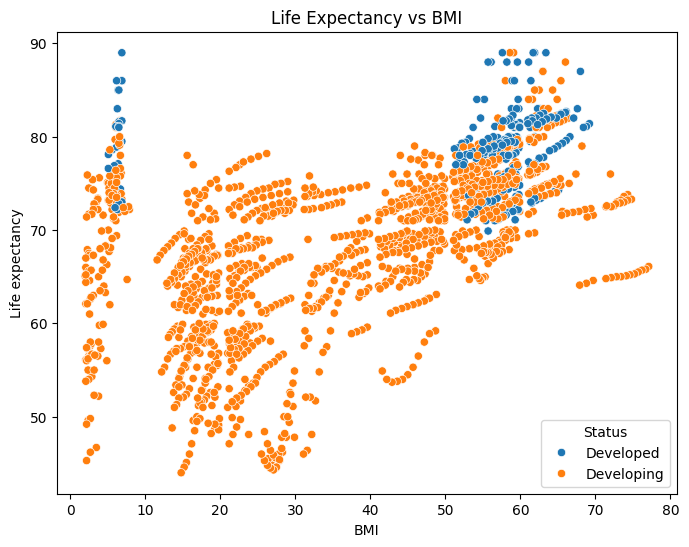

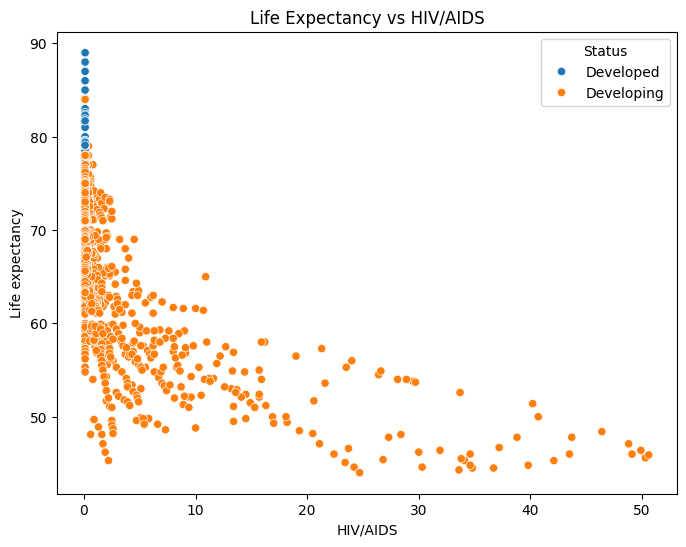

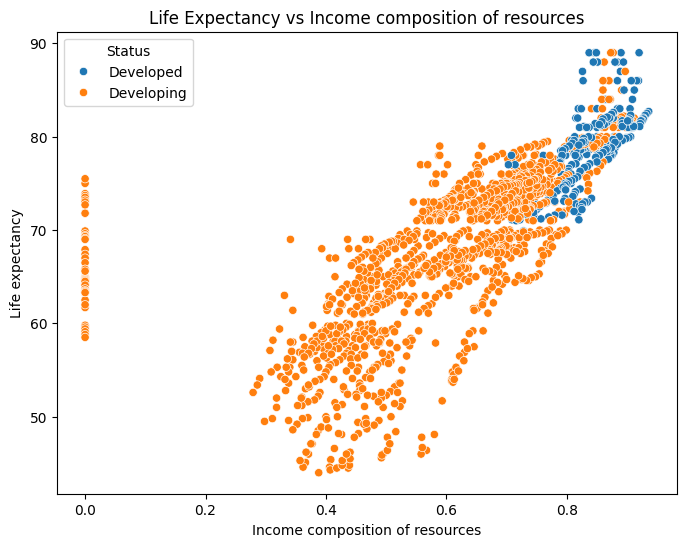

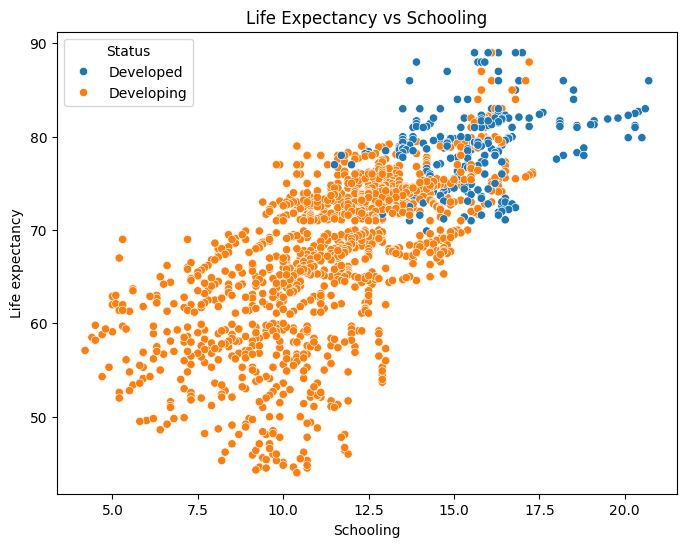

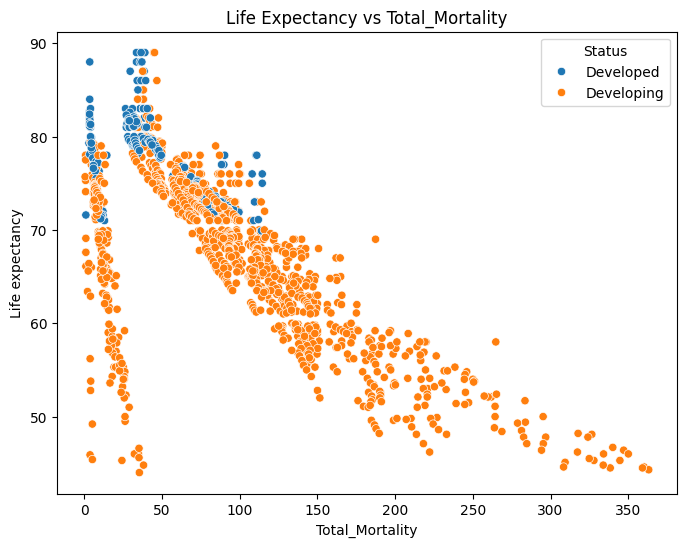

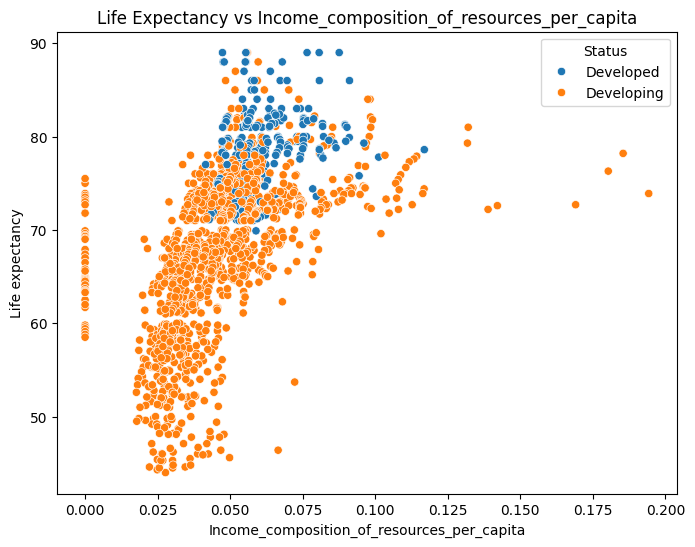

In [833]:
for feature in high_corr_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='Life expectancy', data=df, hue='Status')
    plt.title(f"Life Expectancy vs {feature}")
    plt.show()

## 10.2 Box Plots (Life Expectancy by Status)

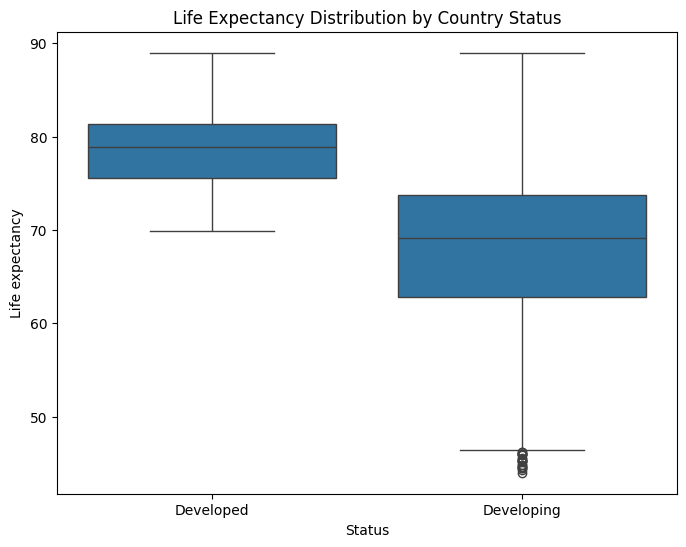

In [834]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=df)
plt.title("Life Expectancy Distribution by Country Status")
plt.show()

## 10.4 3D Plot (Top 3 Features)

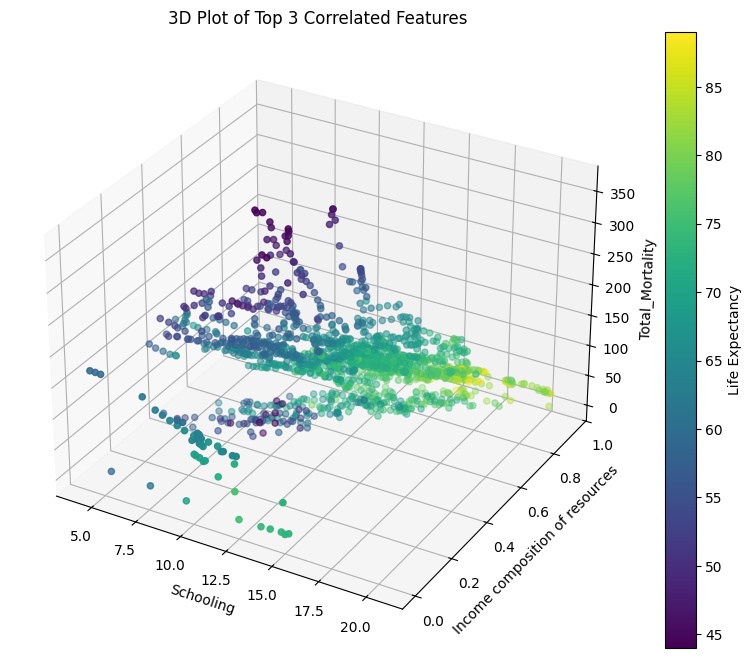

In [835]:
# 3D plot of the most correlated features in the high_corr_features
high_corr_features_sorted = df.select_dtypes(include=[np.number]).corr()['Life expectancy'].drop('Life expectancy').abs().sort_values(ascending=False).index.tolist()

if len(high_corr_features_sorted) >= 3:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df[high_corr_features_sorted[0]], df[high_corr_features_sorted[1]], df[high_corr_features_sorted[2]], c=df['Life expectancy'], cmap='viridis')
    ax.set_xlabel(high_corr_features_sorted[0])
    ax.set_ylabel(high_corr_features_sorted[1])
    ax.set_zlabel(high_corr_features_sorted[2])
    plt.colorbar(scatter, label='Life Expectancy')
    plt.title("3D Plot of Top 3 Correlated Features")
    plt.show()

## 10.5 Violin Plot (BMI Category vs Life Expectancy)

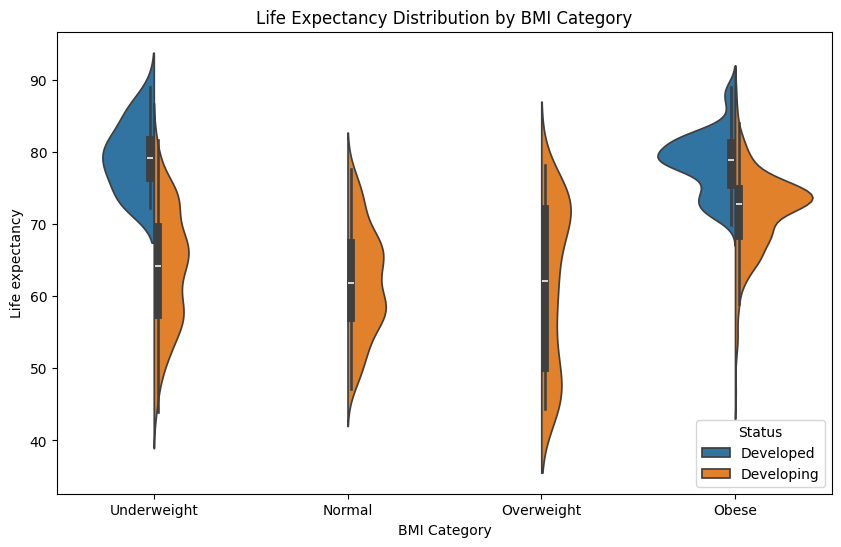

In [836]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='BMI Category', y='Life expectancy', data=df, hue='Status', split=True)
plt.title("Life Expectancy Distribution by BMI Category")
plt.show()

## 10.6 Time Series Analysis (Life Expectancy Over Years)

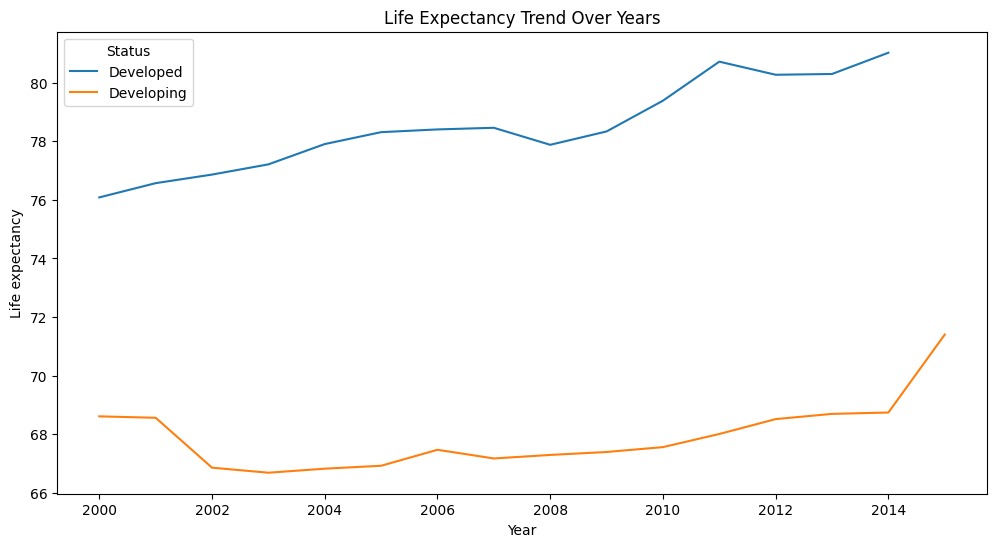

In [837]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy', data=df, hue='Status', ci=None)
plt.title("Life Expectancy Trend Over Years")
plt.show()

# 11. Save the Cleaned Dataset

In [838]:
df.to_csv('cleaned_life_expectancy_data.csv', index=False)

# 12. Key Insights & Recommendations
## 12.1 Insights

The analysis reveals several key correlations with life expectancy:

- High positive correlations:
    - Schooling
    - Income composition of resources

- Slightly high positive correlation:
    - BMI
    - Income composition of resources per capita

- High negative correlations:
    - Adult mortality
    - Total mortality rate (both adult and infant)

- Slightly high negative correlations:
    - Infant deaths
    - HIV/AIDS

These findings suggest that factors such as education, economic resources, and mortality rates have significant relationships with life expectancy.


## 12.2 Recommendations
- Education & Economic Development (Highest Impact)
    - Invest in Schooling Programs

        - Rationale: Schooling shows the strongest positive correlation with life expectancy

        - Action:

            - Expand access to primary and secondary education

            - Implement adult literacy programs

            - Prioritize STEM education for long-term economic growth

    - Boost Economic Opportunities

        - Rationale: Income composition of resources is highly correlated

        - Action:

            - Develop vocational training programs

            - Support small businesses with microfinancing

            - Improve infrastructure to attract foreign investment

- Healthcare System Strengthening
    - Reduce Adult Mortality

        - Rationale: Adult mortality has the strongest negative correlation

        - Action:

            - Expand screening programs for cardiovascular diseases and cancer

            - Improve emergency medical services

            - Train community health workers

    - Combat Infectious Diseases

        - Rationale: HIV/AIDS and infant deaths negatively impact life expectancy

        - Action:

            - Scale up antiretroviral therapy (ART) programs

            - Increase vaccination coverage (measles, polio, diphtheria)

            -Improve maternal and child health services


- Public Health & Nutrition
    - Promote Healthy BMI Ranges

        - Rationale: BMI shows positive correlation up to a healthy range

        - Action:

            - National nutrition education campaigns

            - Subsidize healthy foods (fruits, vegetables)

            - Regulate marketing of unhealthy foods

    - Target High-Risk Groups

        - Rationale: Infant mortality significantly reduces life expectancy

        - Action:

            - Prenatal care programs for at-risk mothers

            - Neonatal intensive care unit (NICU) expansion

            - Parent education on infant care